# **BDS Exercise 2: PySpark DataFrame API**

Lecturer: `Sirasit Lochanachit`

Course: `06026213 Big Data Systems`

Term: `02/2024`

Exercise prepared by `Titipa Eamsiriwong (TA)`

##### 1. ติดตั้ง pySpark และสร้าง SparkSession

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install pyspark

In [7]:
from pyspark.sql import SparkSession
from datetime import date, datetime

spark = SparkSession.builder.getOrCreate()
spark.version

'3.5.4'

##### 2. ติดตั้ง matplotlib, seaborn และ plotly

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##### 3. สร้าง PySpark DataFrame จากไฟล์ข้อมูล hotel_booking.csv โดยแถวแรกของไฟล์จะเป็น Header

> [hotel_booking.csv](https://drive.google.com/file/d/1kQOpNnsc1ccltMxaR8LD-wYuOgIDVld2/view?usp=sharing)



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = spark.read.csv('/content/drive/MyDrive/bigDataSystems/hotel_bookings.csv', header=True)
df

DataFrame[hotel: string, is_canceled: string, lead_time: string, arrival_date_year: string, arrival_date_month: string, arrival_date_week_number: string, arrival_date_day_of_month: string, stays_in_weekend_nights: string, stays_in_week_nights: string, adults: string, children: string, babies: string, meal: string, country: string, market_segment: string, distribution_channel: string, is_repeated_guest: string, previous_cancellations: string, previous_bookings_not_canceled: string, reserved_room_type: string, assigned_room_type: string, booking_changes: string, deposit_type: string, agent: string, company: string, days_in_waiting_list: string, customer_type: string, adr: string, required_car_parking_spaces: string, total_of_special_requests: string, reservation_status: string, reservation_status_date: string]

##### 4. แสดงจำนวนลูกค้าที่จองล่วงหน้า (lead_time) มากกว่า 365 วัน และไม่มีการยกเลิก (is_canceled เป็น 0)

In [10]:
df[(df["lead_Time"] > 365) & (df["is_canceled"] == 0)].show(7)

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+------+---------------------------+-------------------------+------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|   adr|required_car_parking_spaces|to

>(ตัวอย่างผลลัพธ์ ข้อ 5)
>
>image.png

##### 5. สร้าง Line chart โดยใช้ `matplotlib` เพื่อแสดงจำนวนผู้เข้าพักรายปี (arrival_date_year) โดยแยกสีของเส้นตามโรงแรม (hotel)
- ใน Line chart ให้เพิ่ม label จำนวนผู้เข้าพัก บนแต่ละ data point

In [41]:
df5 = df.groupBy("hotel","arrival_date_year").count()

df5.show()

+------------+-----------------+-----+
|       hotel|arrival_date_year|count|
+------------+-----------------+-----+
|Resort Hotel|             2017|13179|
|Resort Hotel|             2015| 8314|
|  City Hotel|             2015|13682|
|  City Hotel|             2016|38140|
|  City Hotel|             2017|27508|
|Resort Hotel|             2016|18567|
+------------+-----------------+-----+



In [52]:
ctht_df = df5.where("hotel=='City Hotel'")
ctht_df = ctht_df.sort(ctht_df['arrival_date_year']).drop('hotel').toPandas()

ctht_df

,arrival_date_year,count
0,2015,13682
1,2016,38140
2,2017,27508


In [54]:
rsht_df = df5.where("hotel=='Resort Hotel'")
rsht_df = rsht_df.sort(rsht_df['arrival_date_year']).drop('hotel').toPandas()

rsht_df

,arrival_date_year,count
0,2015,8314
1,2016,18567
2,2017,13179


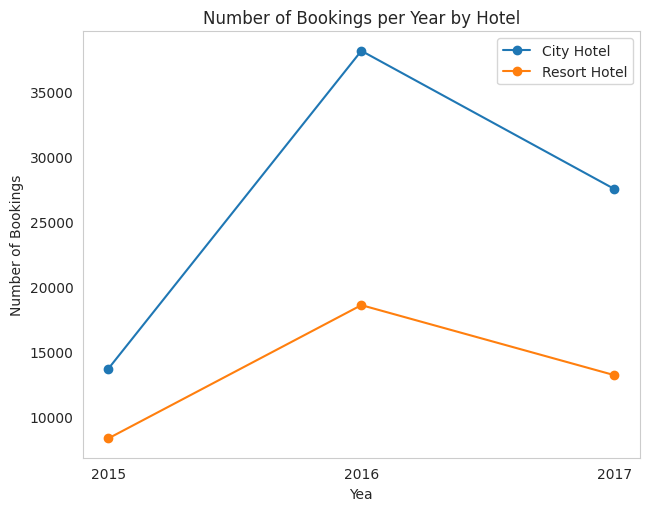

In [62]:
import numpy as np

y1 = np.array(ctht_df['count'])
y2 = np.array(rsht_df['count'])
x = np.array(rsht_df['arrival_date_year'])

plt.plot(x, y1, x, y2, marker = 'o')
plt.grid(False)
plt.tight_layout()
plt.title("Number of Bookings per Year by Hotel")
plt.xlabel("Yea")
plt.ylabel("Number of Bookings")
plt.legend(['City Hotel','Resort Hotel'])
plt.show()

>(ตัวอย่างผลลัพธ์ ข้อ 5)
>
>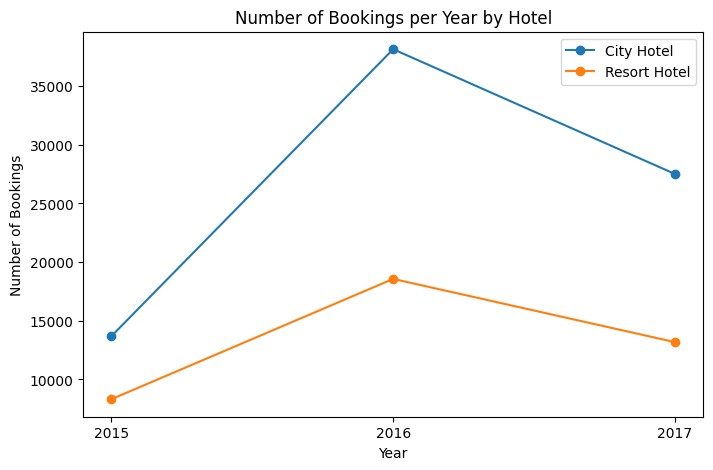

##### 6. สร้างกราฟแท่งแนวนอนด้วย ```seaborn```  แสดง 5 ประเทศแรก (country) ที่มีจำนวนการจองมากทึ่สุด
- ใน bar chart ให้เพิ่ม label แสดงเลขจำนวนการจอง บนแต่ละ bar หรือข้างๆ bar

In [29]:
pandas_df6 = df.groupBy("country").count().sort('count', ascending=False)
pandas_df6 = pandas_df6.toPandas()
pandas_df6

,country,count
0,PRT,48590
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287
...,...,...
173,AIA,1
174,KIR,1
175,PYF,1
176,MMR,1


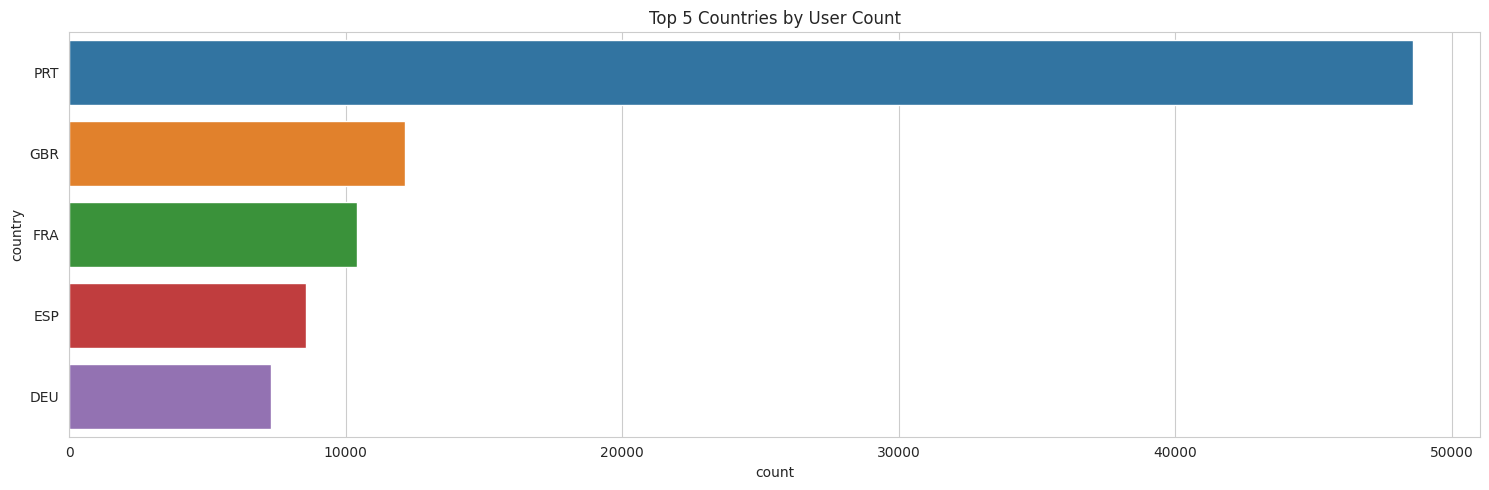

In [63]:
sns.set_style("whitegrid")

plt.figure(figsize=(15,5))
sns.barplot(pandas_df6.head(5), x="count", y="country", hue="country", legend=False)
plt.title("Top 5 Countries by User Count")
plt.xlabel("count")
plt.ylabel("country")
plt.tight_layout()
plt.show()

> (ตัวอย่างผลลัพธ์ ข้อ 6)
>
>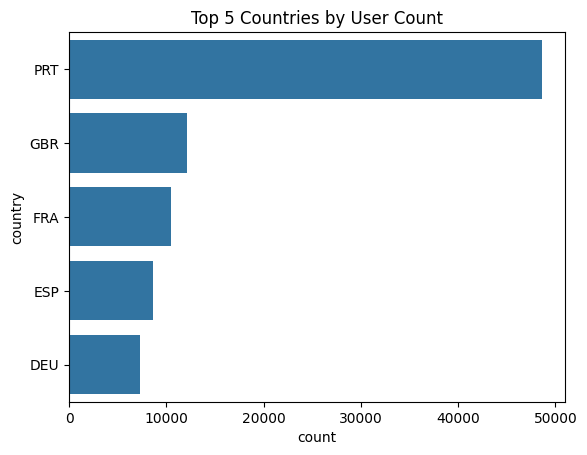

##### 7. สร้างกราฟแท่งแนวตั้งด้วย ```plotly```  แสดงค่าเฉลี่ยของจำนวนวันที่จองล่วงหน้า (lead_time) แยกตามประเภทลูกค้า (customer_type)

In [14]:
pandas_df7 = df.groupBy("customer_type").agg(
    {"lead_time": "avg"}
).toPandas()
pandas_df7

,customer_type,avg(lead_time)
0,Transient,93.295515
1,Transient-Party,137.037056
2,Group,55.057192
3,Contract,142.969823


In [19]:
fig = px.bar(pandas_df7, x="customer_type", y="avg(lead_time)", color="customer_type")
fig.update_layout(
    title="Age Lead Time by Customer Type",
    xaxis_title="Customer Type",
    yaxis_title="Average Lead Time (days)",
)
fig.show()

> (ตัวอย่างผลลัพธ์ ข้อ 7)
>
>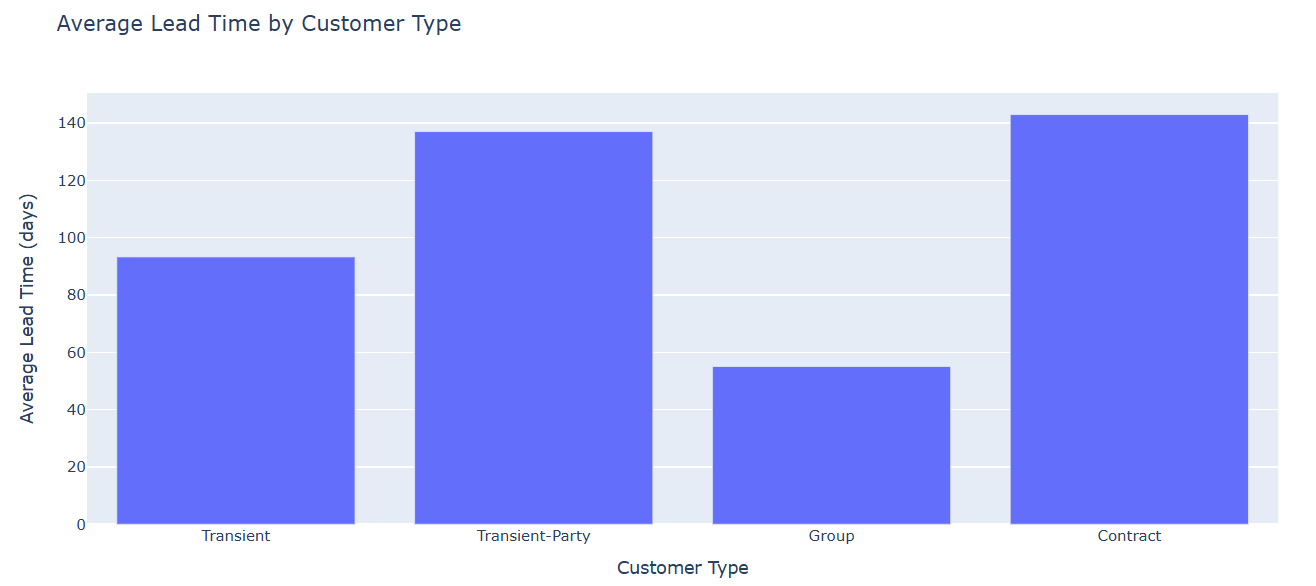